*Think Linear Algebra* is not for sale yet, but if you would like to support this project, you can [buy me a coffee](https://buymeacoffee.com/allendowney).

# Title



[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/ThinkLinearAlgebra/blob/main/nb/track.ipynb).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkLinearAlgebra/raw/main/utils.py")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import decorate, underride

## Section



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def plot_vectors(
    vectors,
    origin=None,
    start=0,
    end=None,
    scale=1,
    labels=None,
    label_pos=None,
    **options
):
    """Plot a set of vectors in 2D or 3D.

    Args:
        vectors: list of vectors or array with one row per vector (shape: (N, 2) or (N, 3))
        origin: list of vectors or array with one row per vector (default: all at (0,0) or (0,0,0))
        start: integer slice index
        end: integer slice index
        scale: factor to multiply vectors
        labels: list of string labels
        label_pos: list of locations as integer clock positions (only for 2D)
        options: passed to plt.quiver
    """
    vectors = np.asarray(vectors) * scale
    dim = vectors.shape[1]  # Determine 2D vs. 3D

    if origin is None:
        origin = np.zeros_like(vectors)
    else:
        origin = np.asarray(origin)

    underride(
        options,
        color="C0",
        alpha=0.6,
    )

    ax = plt.gca()
    if dim == 2:
        # 2D case using plt.quiver
        us, vs = vectors[start:end].T
        xs, ys = origin[start:end].T

        underride(
            options,
            angles="xy",
            scale_units="xy",
            scale=1,
        )

        ax.scatter(xs, ys, s=0)
        ax.scatter(xs + us, ys + vs, s=0)
        ax.quiver(xs, ys, us, vs, **options)

    elif dim == 3:
        # 3D case using ax.quiver
        us, vs, ws = vectors[start:end].T
        xs, ys, zs = origin[start:end].T
        print(xs, ys, zs)

        underride(
            options,
            arrow_length_ratio=0.1,
        )

        ax.scatter(xs, ys, zs, s=0)
        ax.scatter(xs + us, ys + vs, zs + zs, s=0)
        ax.quiver(xs, ys, zs, us, vs, ws, **options)

    else:
        raise ValueError("Only 2D and 3D vectors are supported.")

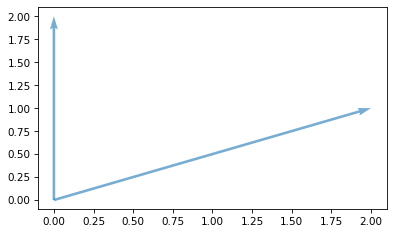

In [10]:
v1 = np.array([2, 1])
v2 = np.array([0, 2])

plot_vectors([v1, v2])

In [11]:
def plot_plane(v1, v2, origin=None, **options):
    """Plot a shaded plane spanned by two vectors in 3D.

    Args:
        v1: First vector defining the plane (array-like, shape (3,))
        v2: Second vector defining the plane (array-like, shape (3,))
        origin: Origin point of the plane (default: [0, 0, 0])
        options: Passed to plot_surface (e.g., color, alpha)
    """
    v1, v2 = np.asarray(v1), np.asarray(v2)

    if len(v1) != 3 or len(v2) != 3:
        raise ValueError("plot_plane requires 3D vectors.")

    if origin is None:
        origin = np.zeros(3)
    else:
        origin = np.asarray(origin)

    # Generate a mesh grid for the plane
    u = [0, 1]
    v = [0, 1]
    U, V = np.meshgrid(u, v)

    # Plane equation: P = origin + U * v1 + V * v2
    X = origin[0] + U * v1[0] + V * v2[0]
    Y = origin[1] + U * v1[1] + V * v2[1]
    Z = origin[2] + U * v1[2] + V * v2[2]

    underride(options, color="gray", alpha=0.3)

    # Plot the plane
    ax = plt.gca()
    ax.plot_surface(X, Y, Z, **options)

[0 0 0] [0 0 0] [0 0 0]


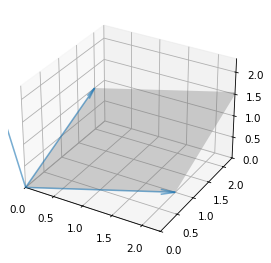

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Example usage to visualize the cross product
v1 = np.array([2, 1, 0])
v2 = np.array([0, 2, 1])
v3 = np.cross(v1, v2)

plot_plane(v1, v2)
plot_vectors([v1, v2, v3])
lim = [0, 2.3]
decorate(xlim=lim, ylim=lim, zlim=lim)

In [8]:
import matplotlib

print(matplotlib.__version__)

3.10.0


Consider this as an example of using cross product

In [ ]:
def angle_between(a, b):
    a = np.asarray(a, float); b = np.asarray(b, float)
    dot = a @ b
    cross = a[0]*b[1] - a[1]*b[0]  # 2D "z-component" of cross
    return np.arctan2(cross, dot)  # in (-π, π]

[Think Linear Algebra](https://allendowney.github.io/ThinkLinearAlgebra/index.html)

Copyright 2025 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)